<a href="https://colab.research.google.com/github/ankitbittu/Telecom-Churn-Analysis/blob/main/Copy_of_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Almabetter/Capstone project 1/Copy of Telecom Churn.csv'
telecom_df=pd.read_csv(file_path)

# **Understanding the columns present in the dataset**




1.   **State**: There are 51 unique states present in the data set.
2.   **Account Length**: It denotes the number of days till which customer used the service.
3.   **Area Code**: 3 unique area codes are present - 408, 415, 510
4.   **International plan** : It contains Yes/No pair, where Yes is customer is using the International plan and No means there is no any such plan.
5.   **Voice Mail Plan**: Similar as above, Yes means customer is using this plan and no means there is no any such plan.

6.   **Number vmail messages**: Customers using the facility of Voice mail plan send the vmail messages which range from 0 to 50.

7.   **Total day minutes**: Number of minutes talked by customers during the day time.

8.   **Total day calls**: Number of calls made by customers during the day.

9.   **Total day charge**: Charges incurred by customer during the day.

10.  **Total eve minutes**: Number of minutes talked by customers during the evening minutes.

11.  **Total eve calls**: Number of calls made by customers during the day.

12.  **Total eve charge**: Charges incurred by customer during evening.

13.  **Total night minutes**: Number of minutes talked by customers during the night minutes.


14.  **Total night calls**: Number of calls made by customers during the day.

15.  **Total night charge**: Charges incurred by customer during night time.

16.  **Total intl minutes**: Number of minutes talked by customers during the international minutes.


17.  **Total intl calls**: Number of calls made by customers during the day.

18.  **Total intl charge**: Charges incurred by customer for international calling.

19.  **Customer service calls**: Denotes the number of customer service calls performed by the user.

20.  **Churn**: Denotes whether customer has churned or not, True indicates Customer has churned while False indicates customer has not churned.

In [4]:
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
telecom_df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [6]:
telecom_df.shape

(3333, 20)

In [7]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

There are no any null values present in any row. So, need to clean the data for null values.

There are also different kinds of dtype objects are present.

Converting the dtype of International plan and Voice mail plan from object to bool to make easier analysis on these columns.


In [8]:
telecom_df['International plan'] = telecom_df['International plan'].replace({'Yes':True,'No':False})
telecom_df['Voice mail plan'] = telecom_df['Voice mail plan'].replace({'Yes':True,'No':False})

In [9]:
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Finding total number of churned users

In [10]:
telecom_df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

Out of the total 3333 customers, 2850 customers are retained and the rest 483 are churning the telecom service.

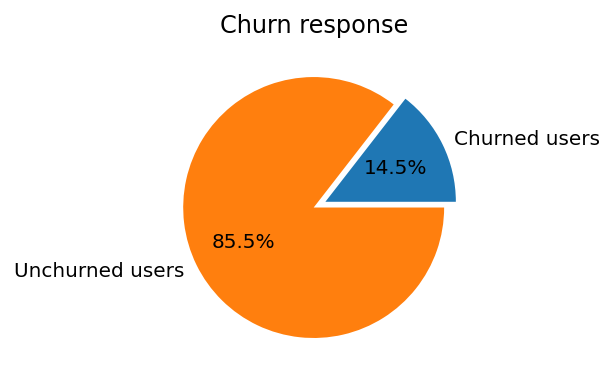

In [11]:
Percent_churned_users = round((telecom_df['Churn'].mean() * 100),3)
Percent_unchurned_users = round((100 - Percent_churned_users),3)
x = [Percent_churned_users, Percent_unchurned_users]
labels = ['Churned users', 'Unchurned users']
explode = [0.1, 0]

fig, ax = plt.subplots(figsize=(4,3),dpi = 144)
ax.pie(x, labels = labels,explode = explode, autopct='%1.1f%%')
ax.set_title('Churn response')
plt.show()

# Deep dive into the statistical analysis of columns which are having numerical data

In [12]:
telecom_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


From the above table, it can be seen that customers have talked less during the day time as compare to evening and night time.

The average number of calls during day, evening and night are almost the same.

Despite having less number of talking minutes during the day time, the charges incurred to the customer is high as compare to evening and night talking minutes.


It can also be visualised in the plot shown below

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

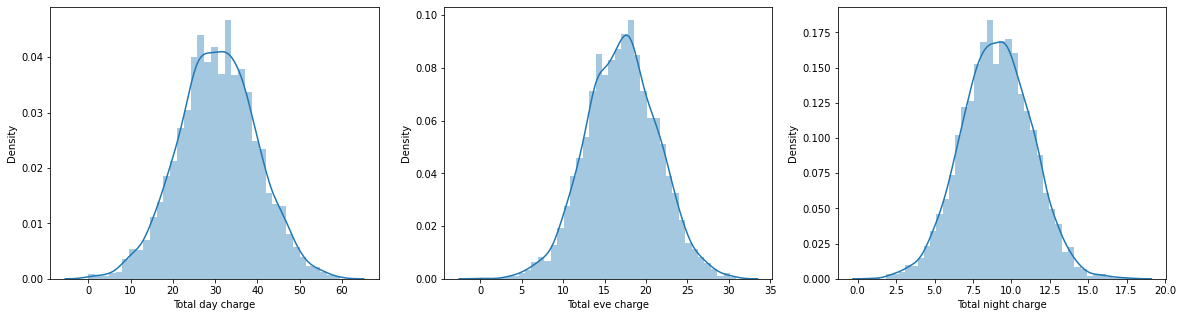

In [14]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sb.distplot(telecom_df['Total day charge'])

plt.subplot(1,3,2)           
sb.distplot(telecom_df['Total eve charge'])

plt.subplot(1,3,3)
sb.distplot(telecom_df['Total night charge'])
plt.show()

# Taking International plan column into account and take some insights from it.

In [15]:
telecom_df['International plan'].value_counts()

False    3010
True      323
Name: International plan, dtype: int64

There are 323 customers out of 3333 who are using the International plan.

Now creating two dataframes one containing the customers who have International plan and other one who don't have the International plan.

In [16]:
Intl_plan_true_df  = telecom_df[telecom_df['International plan'] == True]     # Those who have taken the international plan
Intl_plan_false_df  = telecom_df[telecom_df['International plan'] == False]   # Those who have not taken the international plan

In [17]:
Intl_plan_true_df[['Total intl minutes','Total intl charge']].describe()

,Total intl minutes,Total intl charge
count,323.000000,323.000000
mean,10.628173,2.869907
std,2.697787,0.728151
min,1.300000,0.350000
25%,9.000000,2.430000
50%,10.800000,2.920000
75%,12.200000,3.290000
max,20.000000,5.400000


In [18]:
Intl_plan_false_df[['Total intl minutes','Total intl charge']].describe()

,Total intl minutes,Total intl charge
count,3010.000000,3010.000000
mean,10.195349,2.753279
std,2.798937,0.755716
min,0.000000,0.000000
25%,8.400000,2.270000
50%,10.200000,2.750000
75%,12.100000,3.270000
max,18.900000,5.100000


From the above two tables, it is clearly visible that customers having the International plan are paying almost the same charges for the same International calling minutes as compare to the customers not having the International plan.

Further it can also be seen the plot given below.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


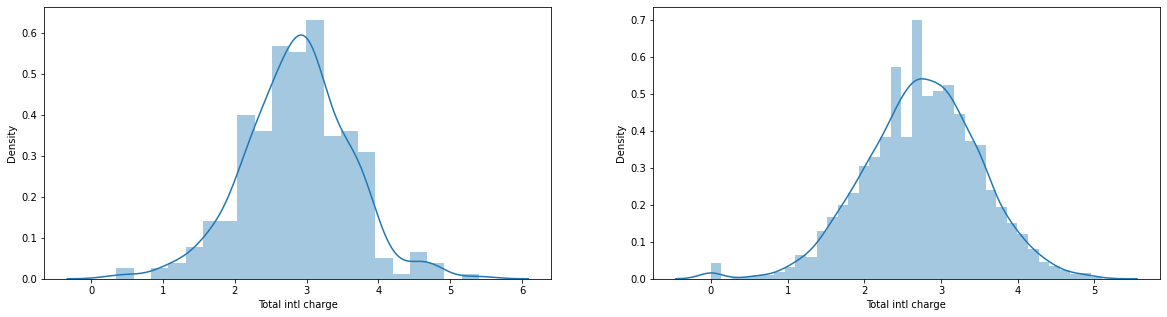

In [20]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sb.distplot(Intl_plan_true_df['Total intl charge'])

plt.subplot(1,2,2)
sb.distplot(Intl_plan_false_df['Total intl charge'])
plt.show()

Drawing a pivot table for the Customers who have taken the International plan considering the churning part.

In [21]:
pd.crosstab(telecom_df["International plan"], telecom_df["Churn"])

Churn,False,True
International plan,,
False,2664,346
True,186,137


The number of customers who have taken the International plan has higher churning rate as compare to those who has not taken.

In [22]:
Intl_churn_rate = telecom_df.groupby(['International plan'])['Churn'].agg([np.mean]).rename(columns = {'mean':'churn_rate'})

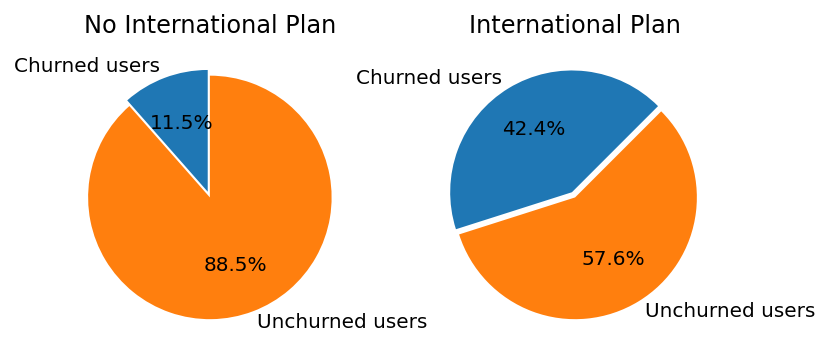

In [23]:
churn_perct_with_no_Intl_plan = round((Intl_churn_rate.iloc[0,0]*100),3)
unchurn_perct_with_no_Intl_plan = 100 - churn_perct_with_no_Intl_plan

churn_perct_with_Intl_plan = round((Intl_churn_rate.iloc[1,0]*100),3)
unchurn_perct_with_Intl_plan = 100 - churn_perct_with_Intl_plan


x1 = [churn_perct_with_no_Intl_plan, unchurn_perct_with_no_Intl_plan]
x2 = [churn_perct_with_Intl_plan, unchurn_perct_with_Intl_plan]

labels = ['Churned users', 'Unchurned users']
explode = [0.05, 0]

fig = plt.figure(figsize=(6,7),dpi=144)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.pie(x1, labels = labels,explode = explode, autopct='%1.1f%%', startangle=90)
ax2.pie(x2, labels = labels,explode = explode, autopct='%1.1f%%', startangle=45)
ax1.set_title('No International Plan')
ax2.set_title('International Plan')
plt.show()

In [ ]:
#telecom_df['Total charges'] = telecom_df['Total day charge'] + telecom_df['Total eve charge'] + telecom_df['Total night charge'] + telecom_df['Total intl charge']

In [ ]:
#telecom_df[numerical].hist(figsize=(20,20));

# Considering Voice mail plan in the next part. In this, the proportion of users who are churning with respect to the their voice mail plan is found out.

In [ ]:
#telecom_df['Voice mail plan'].value_counts()

In [24]:
pd.crosstab(telecom_df["Voice mail plan"], telecom_df["Churn"])

Churn,False,True
Voice mail plan,,
False,2008,403
True,842,80


It is interesting to see that the number of customers who are not using the Voice mail plan are churning more as compare to those who have no Voice mail plan.

In [25]:
voice_churn_rate = telecom_df.groupby(['Voice mail plan'])['Churn'].agg([np.mean]).rename(columns = {'mean':'churn_rate'})

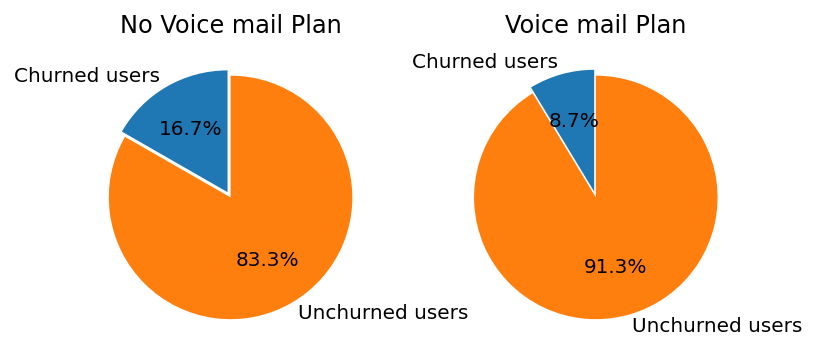

In [26]:
churn_perct_with_no_voice_plan = round((voice_churn_rate.iloc[0,0]*100),3)
unchurn_perct_with_no_voice_plan = 100 - churn_perct_with_no_voice_plan

churn_perct_with_voice_plan = round((voice_churn_rate.iloc[1,0]*100),3)
unchurn_perct_with_voice_plan = 100 - churn_perct_with_voice_plan


x1 = [churn_perct_with_no_voice_plan, unchurn_perct_with_no_voice_plan]
x2 = [churn_perct_with_voice_plan, unchurn_perct_with_voice_plan]

labels = ['Churned users', 'Unchurned users']
explode = [0.05, 0]

fig = plt.figure(figsize=(6,7),dpi=144)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.pie(x1, labels = labels,explode = explode, autopct='%1.1f%%', startangle=90)
ax2.pie(x2, labels = labels,explode = explode, autopct='%1.1f%%', startangle=90)
ax1.set_title('No Voice mail Plan')
ax2.set_title('Voice mail Plan')
plt.show()

Not getting any kind of inference that why it is happenening. It may be possible that there might be some other reasons and not the voice mail plan due to which customers are churning out.

Therefore considering both International plan and Voice mail plan with respect to churn

In [29]:
pd.pivot_table(data = telecom_df, index = ['Voice mail plan', 'International plan'], values = 'Churn')

Churn
Voice mail plan International plan          
False           False               0.138532
                True                0.437229
True            False               0.053012
                True                0.391304

From the above table it is clear that only Voice mail plan is very little role for customers to be churned out and there are some other factors which are affecting more.

# Account length with respect to churn

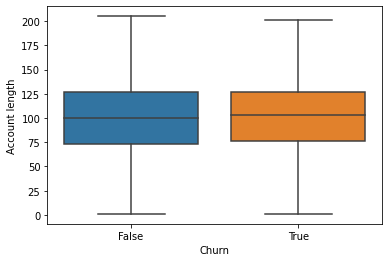

In [ ]:
sb.boxplot(y='Account length', x='Churn', data=telecom_df, sym = '')

From the above box plot, it clearly shows that the same plot for both churned and unchurned users. Hence it is not affecting the churn rate.

# Area code wise Churned users

In [ ]:
telecom_df.groupby('Area code')['Churn'].value_counts()

Area code  Churn
408        False     716
           True      122
415        False    1419
           True      236
510        False     715
           True      125
Name: Churn, dtype: int64

In [ ]:
pd.pivot_table(telecom_df,index=['Area code'],values=['Churn'])

,Churn
Area code,
408,0.145585
415,0.142598
510,0.148810


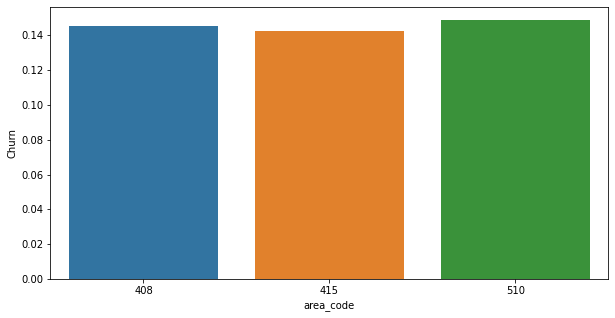

In [ ]:
area_churn = pd.pivot_table(telecom_df,index=['Area code'],values=['Churn'])
area_churn['area_code'] = area_churn.index

plt.figure(figsize=(10,5))
sb.barplot(y='Churn', x='area_code', data=area_churn)


The churn rate of customers is approximately same for each area code. So, this area code data is not providing any kind of inference in order to solve the churning problem.

# Taking all the day, evening, night columns with respect to the Churn

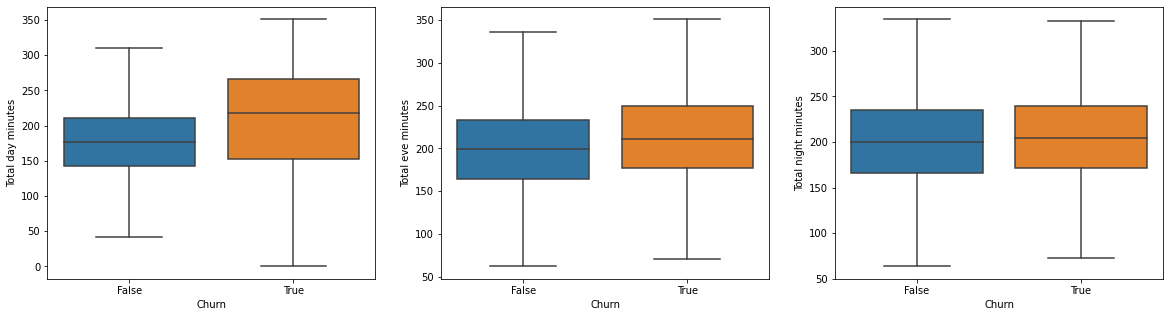

In [30]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sb.boxplot(y='Total day minutes', x='Churn', data=telecom_df, sym = '')

plt.subplot(1,3,2)
sb.boxplot(y='Total eve minutes', x='Churn', data=telecom_df, sym = '')

plt.subplot(1,3,3)
sb.boxplot(y='Total night minutes', x='Churn', data=telecom_df, sym = '')

plt.show()

This clearly shows that during the day time, customers who are churning out have higher talking minutes as compare to the non-churning customer.

For the evening and the night time, talking minutes is almost same for churned and non-churned customers in each case. So, these two columns won't contribute for the churn analysis. 

It can also be seen by using the describe table.

In [31]:
churned_users = telecom_df[telecom_df['Churn'] == True]
unchurned_users = telecom_df[telecom_df['Churn'] == False]

In [33]:
churned_users.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.00000,483.000000,483.000000,483.000000
mean,102.664596,437.817805,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.70000,4.163561,2.889545,2.229814
std,39.467820,42.792270,11.860138,68.997792,21.582307,11.729710,51.728910,19.724711,4.396762,47.132825,19.950659,2.121081,2.79319,2.551575,0.754152,1.853275
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,70.900000,48.000000,6.030000,47.400000,49.000000,2.130000,2.00000,1.000000,0.540000,0.000000
25%,76.000000,408.000000,0.000000,153.250000,87.500000,26.055000,177.100000,87.000000,15.055000,171.250000,85.000000,7.705000,8.80000,2.000000,2.380000,1.000000
50%,103.000000,415.000000,0.000000,217.600000,103.000000,36.990000,211.300000,101.000000,17.960000,204.800000,100.000000,9.220000,10.60000,4.000000,2.860000,2.000000
75%,127.000000,510.000000,0.000000,265.950000,116.500000,45.210000,249.450000,114.000000,21.205000,239.850000,115.000000,10.795000,12.80000,5.000000,3.460000,4.000000
max,225.000000,510.000000,48.000000,350.800000,165.000000,59.640000,363.700000,168.000000,30.910000,354.900000,158.000000,15.970000,20.00000,20.000000,5.400000,9.000000


In [34]:
unchurned_users.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,100.793684,437.074737,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
std,39.882350,42.306156,13.913125,50.181655,19.801157,8.530835,50.292175,19.958414,4.274863,51.105032,19.506246,2.299768,2.784489,2.441984,0.751784,1.163883
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,142.825000,87.000000,24.282500,164.500000,87.000000,13.980000,165.900000,87.000000,7.470000,8.400000,3.000000,2.270000,1.000000
50%,100.000000,415.000000,0.000000,177.200000,100.000000,30.120000,199.600000,100.000000,16.970000,200.250000,100.000000,9.010000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,22.000000,210.300000,114.000000,35.750000,233.200000,114.000000,19.820000,234.900000,113.000000,10.570000,12.000000,6.000000,3.240000,2.000000
max,243.000000,510.000000,51.000000,315.600000,163.000000,53.650000,361.800000,170.000000,30.750000,395.000000,175.000000,17.770000,18.900000,19.000000,5.100000,8.000000


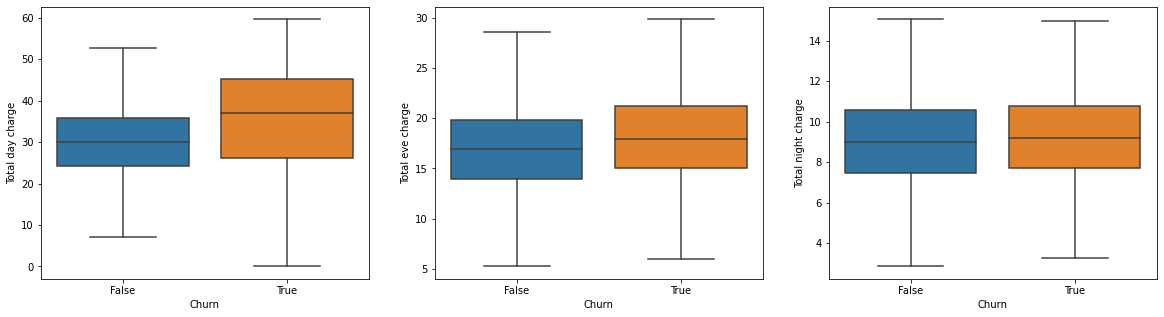

In [35]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sb.boxplot(y='Total day charge', x='Churn', data=telecom_df, sym = '')

plt.subplot(1,3,2)
sb.boxplot(y='Total eve charge', x='Churn', data=telecom_df, sym = '')

plt.subplot(1,3,3)
sb.boxplot(y='Total night charge', x='Churn', data=telecom_df, sym = '')

plt.show()

These plots for day, evening and night charges are similar to the minutes plot shown above. It is quite obvious that more talking minutes will incur more charges. Similarly, evening and night charge are not contributing to churn analysis.

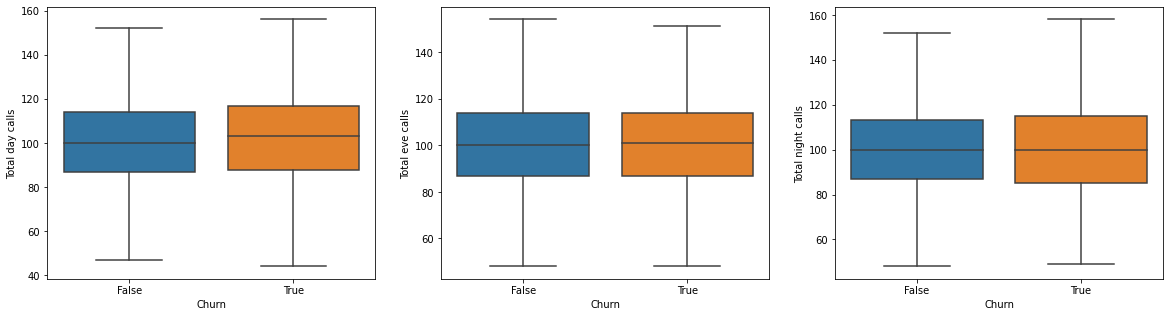

In [36]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sb.boxplot(y='Total day calls', x='Churn', data=telecom_df, sym = '')

plt.subplot(1,3,2)
sb.boxplot(y='Total eve calls', x='Churn', data=telecom_df, sym = '')

plt.subplot(1,3,3)
sb.boxplot(y='Total night calls', x='Churn', data=telecom_df, sym = '')

plt.show()

Average calls for day, evening and night are almost similar for both churned and unchurned users. So, these columns cannot be used for churn data analysis.

# Now Considering Customer service calls with respect to churn

In [37]:
pd.crosstab(telecom_df["Customer service calls"], telecom_df["Churn"])

Churn,False,True
Customer service calls,,
0,605,92
1,1059,122
2,672,87
3,385,44
4,90,76
5,26,40
6,8,14
7,4,5
8,1,1


In [38]:
customer_call_churn = telecom_df.groupby(['Customer service calls'])['Churn'].agg([np.mean]).rename(columns = {'mean':'churn_rate'})
customer_call_churn['number'] = customer_call_churn.index.values


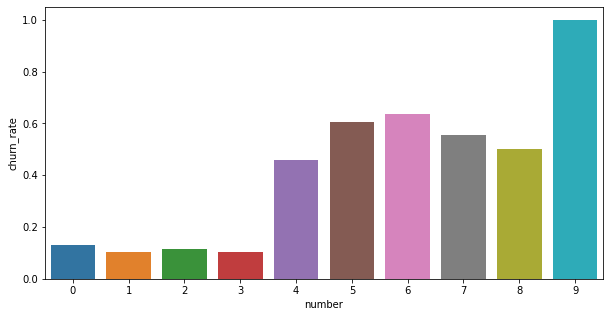

In [39]:
plt.figure(figsize=(10,5))
sb.barplot(y='churn_rate', x='number', data=customer_call_churn)

From this bar plot, it is clearly seen that the users who are calling customer care service more than 3 times are churning at higher rate. May be these customers are not happy with the service and if issues are not resolved till 3 customer calls, most of the customers end up churning out from the service.

# State wise churned customers data

In [40]:
pd.crosstab(telecom_df['State'], telecom_df['Churn'], margins=True)

Churn,False,True,All
State,,,
AK,49,3,52
AL,72,8,80
AR,44,11,55
AZ,60,4,64
CA,25,9,34
CO,57,9,66
CT,62,12,74
DC,49,5,54
DE,52,9,61


In [41]:
state_churn = pd.pivot_table(telecom_df,index=['State'],values=['Churn'], aggfunc = np.mean)
state_churn = state_churn.sort_values(by = 'Churn', ascending = False)
state_churn

,Churn
State,
NJ,0.264706
CA,0.264706
TX,0.250000
MD,0.242857
SC,0.233333
MI,0.219178
MS,0.215385
NV,0.212121
WA,0.212121


In [42]:
state_churn['state name'] = state_churn.index

In [43]:
#Top 5 states with higher churn rate
state_churn.head()

,Churn,state name
State,,
NJ,0.264706,NJ
CA,0.264706,CA
TX,0.250000,TX
MD,0.242857,MD
SC,0.233333,SC


<BarContainer object of 5 artists>

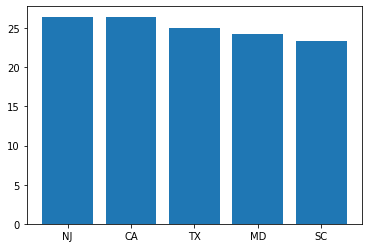

In [44]:
plt.bar(state_churn.head()['state name'],state_churn.head()['Churn']*100)


This shows that the top 5 states with are higher churning rates are NJ, CA, TX, MD and SC and their churning rate is more than 23 %.

In [ ]:
#state_churn = pd.pivot_table(telecom_df,index=['State'],values=['Churn'], aggfunc = np.mean)
#state_churn = state_churn.sort_values(by = 'Churn', ascending = False)


In [ ]:
#Intl_churn_table = pd.pivot_table(telecom_df, values='Churn', index=['International plan'], aggfunc=[len,np.sum,np.mean])
#Intl_churn_table

**Till now, it is understood that there are few column datas which are actually affecting the churn rate like Total day minutes/Total day charge, International plan, Customer service calls while others are having less impact on the churn rate.**



Plotting bivariate 

Taking the Total day minutes vs churn graph for each customer service calls

Text(0.5, 1.0, 'Customer call = 7')

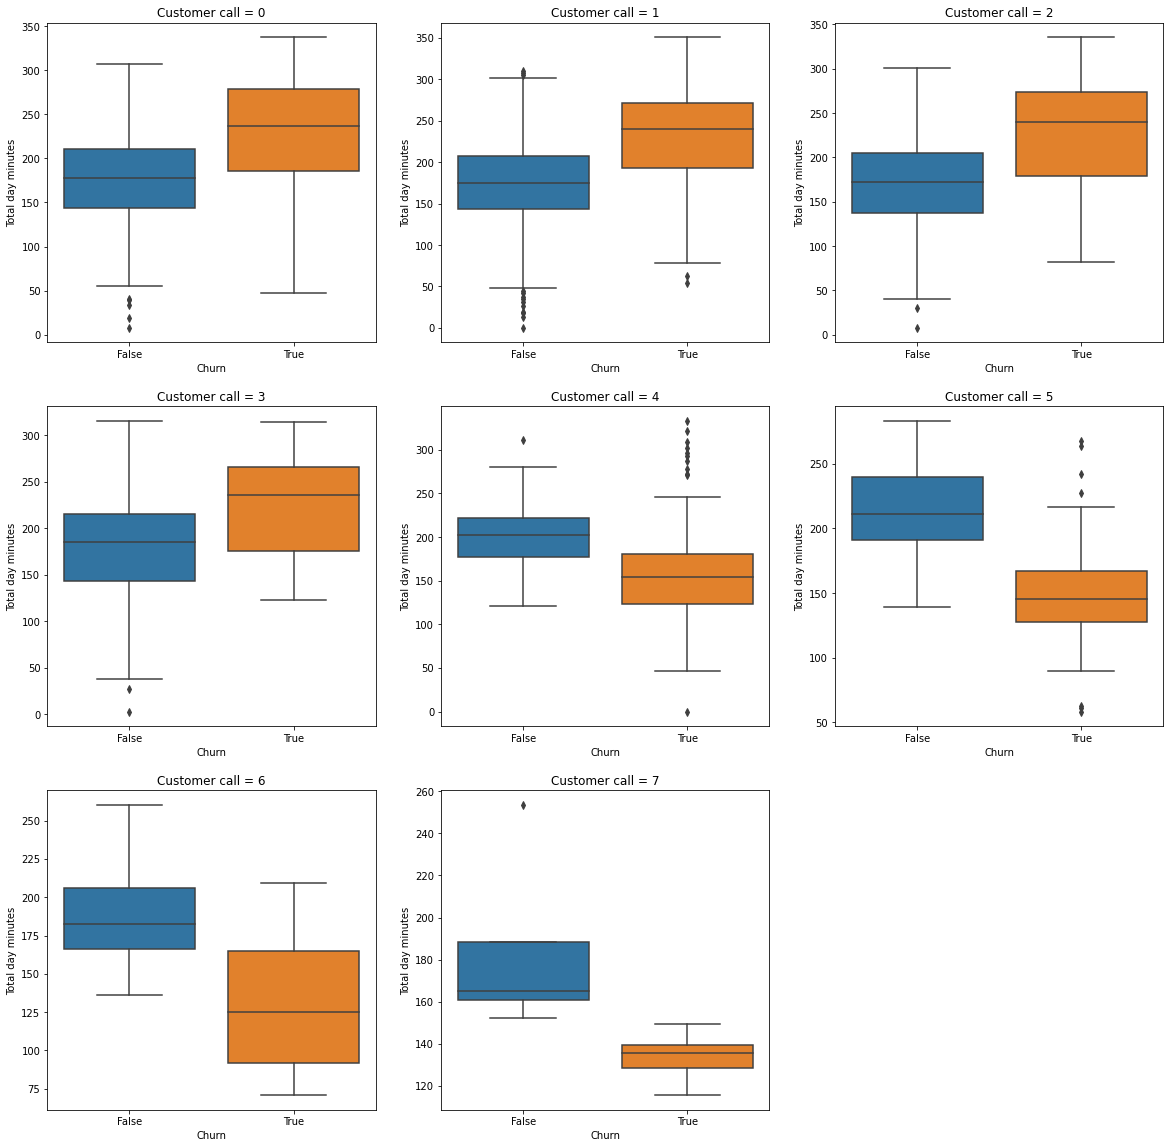

In [45]:
customer_call_0 = telecom_df[telecom_df['Customer service calls'] == 0]
customer_call_1 = telecom_df[telecom_df['Customer service calls'] == 1]
customer_call_2 = telecom_df[telecom_df['Customer service calls'] == 2]
customer_call_3 = telecom_df[telecom_df['Customer service calls'] == 3]
customer_call_4 = telecom_df[telecom_df['Customer service calls'] == 4]
customer_call_5 = telecom_df[telecom_df['Customer service calls'] == 5]
customer_call_6 = telecom_df[telecom_df['Customer service calls'] == 6]
customer_call_7 = telecom_df[telecom_df['Customer service calls'] == 7]


plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sb.boxplot(data = customer_call_0, y = 'Total day minutes', x = 'Churn').set_title('Customer call = 0')

plt.subplot(3,3,2)
sb.boxplot(data = customer_call_1, y = 'Total day minutes', x = 'Churn').set_title('Customer call = 1')

plt.subplot(3,3,3)
sb.boxplot(data = customer_call_2, y = 'Total day minutes', x = 'Churn').set_title('Customer call = 2')

plt.subplot(3,3,4)
sb.boxplot(data = customer_call_3, y = 'Total day minutes', x = 'Churn').set_title('Customer call = 3')

plt.subplot(3,3,5)
sb.boxplot(data = customer_call_4, y = 'Total day minutes', x = 'Churn').set_title('Customer call = 4')

plt.subplot(3,3,6)
sb.boxplot(data = customer_call_5, y = 'Total day minutes', x = 'Churn').set_title('Customer call = 5')

plt.subplot(3,3,7)
sb.boxplot(data = customer_call_6, y = 'Total day minutes', x = 'Churn').set_title('Customer call = 6')

plt.subplot(3,3,8)
sb.boxplot(data = customer_call_7, y = 'Total day minutes', x = 'Churn').set_title('Customer call = 7')


It can be seen from the above plotting that as the number of customer service calls increases beyond 3 calls, Total day minutes decreases for the customers who are churning out of the service. It means Customers are leaving the service because their grievances are not being tackled.

Now, Considering total  with respect to International plan

In [46]:
telecom_df['Intl_charge_per_min'] = telecom_df['Total intl charge']/telecom_df['Total intl minutes']

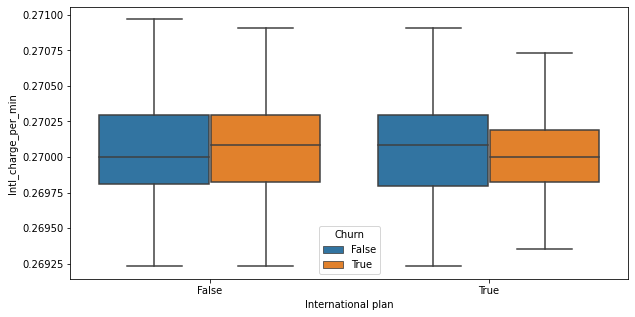

In [47]:
plt.figure(figsize=(10,5))

sb.boxplot(data = telecom_df, y = 'Intl_charge_per_min', x = 'International plan', hue = 'Churn', sym = '')

From this plot, it can be observed that customers despite of having the international plan are paying almost same charges per international minute as compare to those who have not taken the plan. That's why most of the customers have not taken this plan. And those whose taken the plan are churning at a higher rate.


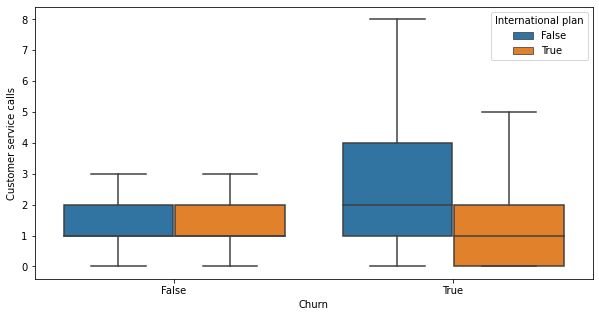

In [48]:
plt.figure(figsize=(10,5))

sb.boxplot(data = telecom_df, y = 'Customer service calls', hue = 'International plan', x = 'Churn', sym = '')

This plotting also clears that the customers who are churning are actually doing more number of customer calls but among these customers who are having International plan are doing less number of customer service calls. This may be due to the reason of International plan tarrif provided by the company.

# Presenting the detailed report for each state for only churned customers

In [49]:
telecom_df['Churn_intl_users'] = (telecom_df['Churn'] == True) & (telecom_df['International plan'] == True)

In [50]:
State_report = telecom_df.groupby('State').agg({'Churn':np.sum, 'International plan':np.sum,'Churn_intl_users':np.sum, 'Total day minutes':np.mean})
#State_report['Intl chrg per min'] = churned_users['Total intl charge']
State_report['Total users'] = telecom_df['State'].value_counts() 

State_report['Churn_rate'] = State_report['Churn']/State_report['Total users']

State_report['Total day mins churned users'] = churned_users.groupby('State')['Total day minutes'].mean()

cols = ['Total users','Churn','Churn_rate','International plan','Churn_intl_users','Total day minutes','Total day mins churned users']
State_report = State_report[cols]

#State_report = State_report.rename(columns= {'International plan':'Churned users with Intl plan', 'Today day minuters':'Total day mins churned users','Customer service call':'Cust calls churned users'})
State_report = State_report.sort_values(by = 'Churn_rate', ascending = False) 

State_report

,Total users,Churn,Churn_rate,International plan,Churn_intl_users,Total day minutes,Total day mins churned users
State,,,,,,,
NJ,68,18,0.264706,6,3,196.225000,231.483333
CA,34,9,0.264706,4,2,183.564706,190.322222
TX,72,18,0.250000,6,4,181.516667,216.438889
MD,70,17,0.242857,10,6,197.228571,230.200000
SC,60,14,0.233333,2,1,166.441667,213.564286
MI,73,16,0.219178,9,6,180.593151,197.662500
MS,65,14,0.215385,8,3,177.929231,196.664286
NV,66,14,0.212121,9,6,176.425758,215.435714
WA,66,14,0.212121,4,3,178.742424,214.771429


International users who churned in the top 5 states

In [ ]:
Churned_intl_users = State_report.head()['Churn_intl_users'].sum()
Churned_intl_users

16

Total International users in the top 5 states

In [ ]:
Total_intl_users = State_report.head()['International plan'].sum()
Total_intl_users

28

Percantage of International users who churned in the top 5 states

In [ ]:
Churned_intl_users * 100/Total_intl_users

57.142857142857146

So, International plan is playing a crucial role for higher rate of churning in the top 5 states.

Also the Total day minutes for churned users in top 5 states is way more higher than the Total day minutes for all the users in these states. And charges of day calling is higher, that's why most of the people are churning.

# **OUTCOMES**



1.   Higher charges for day time calling as compare to evening and night, so the users talking more on day time likely to be churned.
2.   No advantage of International plan as the charges are almost same for     users and non users which made International plan users to churn.
3.   More than 3 number of Customer service calls results into higher rate of churning.




# **SUGGESTIONS**

1.   Charging rate should be managed especially for the day time.
2.   Can provide incentives for talking more number of minutes.
3.   International plan needs to be improved.
4.   Grievance redressal for users should be tackled within 2-3 Customer service calls.
5.   Focus on top 5 states where churning rate is higher.